# Quickstart

*prose* contains the structure to build astronomical images pipelines. 

Here is a quick example pipeline to characterize the point spread function (PSF). Let's start by loading an example [Image](prose.Image).

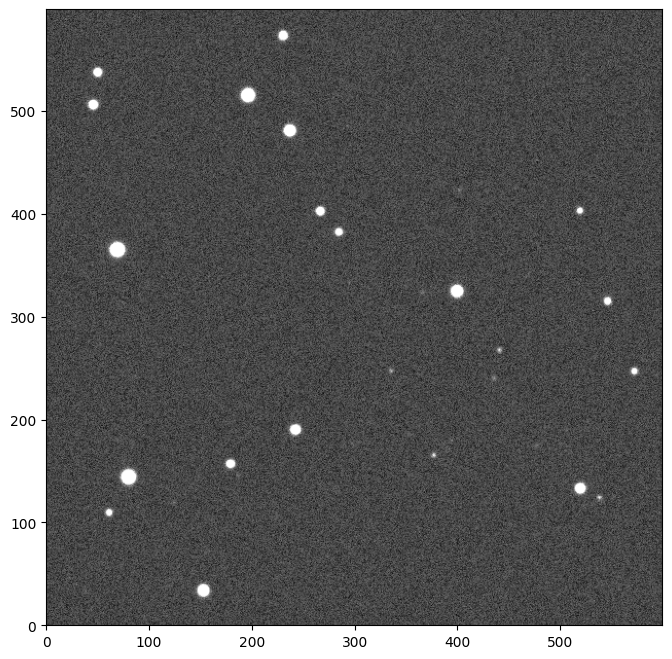

In [1]:
from prose import Sequence, blocks, example_image
import matplotlib.pyplot as plt

# getting the example image
image = example_image()
image.show()

We can now build a [Sequence](prose.Sequence) containing single processing units called [Block](prose.Block) that will sequentially process our image.

  0%|          | 0/1 [00:00<?, ?images/s]

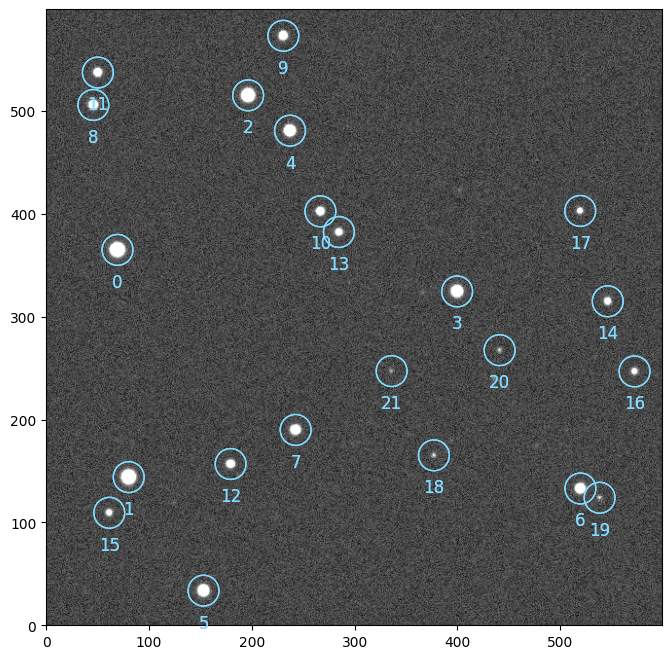

In [2]:
sequence = Sequence([
    blocks.detection.PointSourceDetection(),  # stars detection
    blocks.Cutouts(21),  # cutouts extraction
    blocks.MedianEPSF(),       # PSF building
    blocks.Moffat2D(),        # PSF modeling
])

sequence.run([image])

# plotting the detected stars
image.show()
image.sources.plot()

Let's plot the results of the PSF building and modeling from the [Image](prose.Image) attributes.

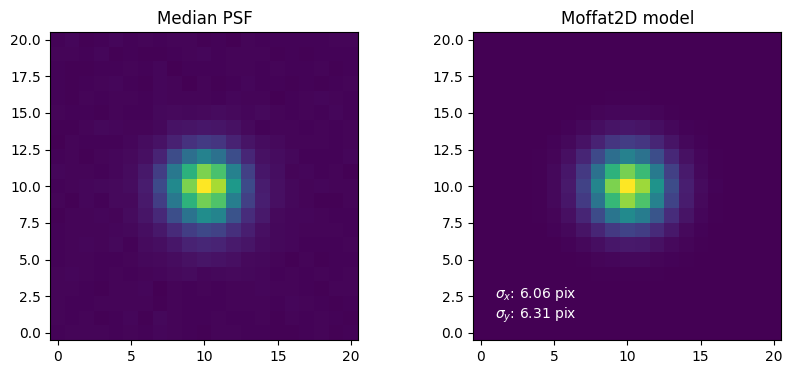

In [3]:
plt.figure(None, (10, 4))

# PSF building
plt.subplot(1, 2, 1, title="Median PSF")
plt.imshow(image.epsf.data, origin="lower")

# PSF modeling
params = image.epsf.params
model = image.epsf.model

plt.subplot(1, 2, 2, title=f"Moffat2D model")
plt.imshow(model(params), origin="lower")
_ = plt.text(1, 1, f"$\sigma_x$: {params['sigma_x']:.2f} pix\n$\sigma_y$: {params['sigma_y']:.2f} pix", c="w")

*prose* contains a wide variety of blocks implementing methods and algorithms commonly used in astronomical image processing.